In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
df=pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.shape

(9578, 14)

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [9]:
#handling imbalanced dataset
not_fully_paid_0 = df[df['not.fully.paid'] == 0]
not_fully_paid_1 = df[df['not.fully.paid'] == 1]

print('not_fully_paid_0', not_fully_paid_0.shape)
print('not_fully_paid_1', not_fully_paid_1.shape)

not_fully_paid_0 (8045, 14)
not_fully_paid_1 (1533, 14)


In [10]:
#handling imbalanced data
from sklearn.utils import resample
df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)
new_df = pd.concat([not_fully_paid_0, df_minority_upsampled])

from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [11]:
new_df['not.fully.paid'].value_counts()  #imbalanced data handled

1    8045
0    8045
Name: not.fully.paid, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in new_df.columns:
    if new_df[i].dtypes == 'object':
        
        new_df[i] = le.fit_transform(new_df[i])

In [13]:
new_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8569,0,0,0.1418,270.70,10.778956,15.10,657,4710.000000,5192,78.7,0,1,0,1
7813,0,1,0.1217,499.45,11.329003,17.02,712,4320.000000,37570,59.5,5,0,0,0
8621,0,0,0.1450,68.85,11.127263,24.16,662,5370.000000,10498,100.0,1,0,0,1
2532,1,4,0.1411,222.49,11.198215,11.59,767,5522.958333,0,34.5,1,0,0,1
8418,0,0,0.1261,723.74,11.736069,16.94,687,4020.000000,167006,53.5,3,0,0,1


In [14]:
new_df.corr().abs()['not.fully.paid'].sort_values(ascending = False)

not.fully.paid       1.000000
int.rate             0.212834
fico                 0.207025
credit.policy        0.204131
inq.last.6mths       0.179799
revol.util           0.108779
installment          0.064936
pub.rec              0.061514
revol.bal            0.060873
purpose              0.048798
dti                  0.047192
days.with.cr.line    0.044284
log.annual.inc       0.042824
delinq.2yrs          0.007597
Name: not.fully.paid, dtype: float64

<AxesSubplot:>

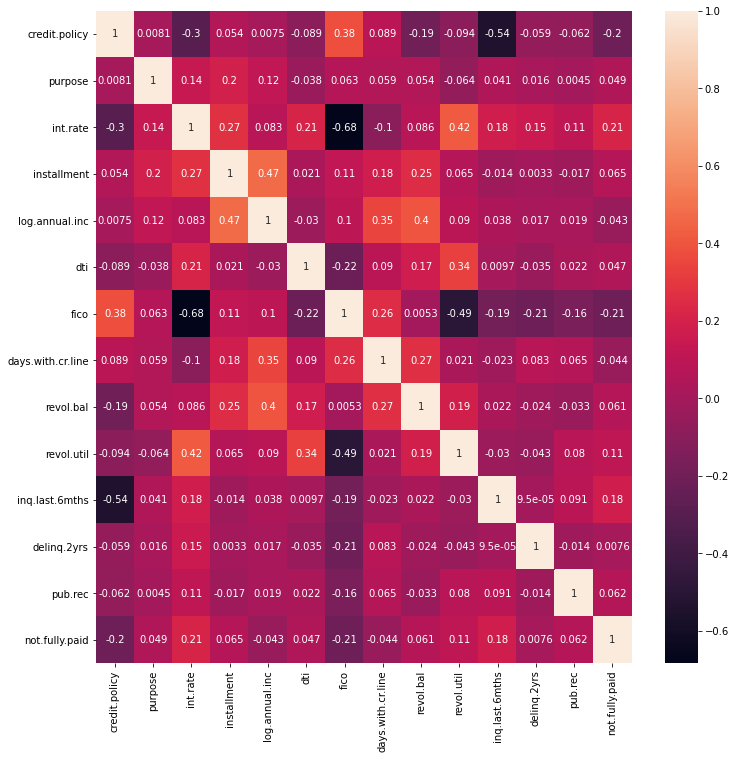

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
f,axes = plt.subplots(1,1,figsize = (12,12))
sns.heatmap(new_df.corr(), annot = True, ax = axes)

In [16]:
X = new_df[["int.rate", "fico", "credit.policy", "inq.last.6mths", "revol.util", "pub.rec", "installment", "purpose"]]
y = new_df["not.fully.paid"]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=[8]
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 134,145
Trainable params: 134,145
Non-trainable params: 0
__________________________________________________

In [20]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [21]:
early_stopping = keras.callbacks.EarlyStopping(patience = 10, min_delta = 0.001, 
                                               restore_best_weights =True )
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1, 
)

Epoch 1/1000
51/51 [==============================] - 1s 11ms/step - loss: 0.6508 - binary_accuracy: 0.6112 - val_loss: 0.6414 - val_binary_accuracy: 0.6262
Epoch 2/1000
51/51 [==============================] - 0s 7ms/step - loss: 0.6421 - binary_accuracy: 0.6241 - val_loss: 0.6450 - val_binary_accuracy: 0.6240
Epoch 3/1000
51/51 [==============================] - 0s 8ms/step - loss: 0.6378 - binary_accuracy: 0.6269 - val_loss: 0.6398 - val_binary_accuracy: 0.6324
Epoch 4/1000
51/51 [==============================] - 0s 7ms/step - loss: 0.6386 - binary_accuracy: 0.6297 - val_loss: 0.6357 - val_binary_accuracy: 0.6311
Epoch 5/1000
51/51 [==============================] - 0s 7ms/step - loss: 0.6338 - binary_accuracy: 0.6382 - val_loss: 0.6370 - val_binary_accuracy: 0.6299
Epoch 6/1000
51/51 [==============================] - 0s 8ms/step - loss: 0.6311 - binary_accuracy: 0.6381 - val_loss: 0.6339 - val_binary_accuracy: 0.6308
Epoch 7/1000
51/51 [==============================] - 0s 8ms/st

In [22]:
predictions =(model.predict(X_test)>0.5).astype("int32")
              
predictions

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, predictions)

0.8424487259167185

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1634
           1       0.80      0.91      0.85      1584

    accuracy                           0.84      3218
   macro avg       0.85      0.84      0.84      3218
weighted avg       0.85      0.84      0.84      3218

